In [1]:
import numpy

In [2]:
help(numpy.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=None, replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings in Python 3k.  The strings
        in a 

In [3]:
import os
distance_file = os.path.join('distance_data_headers.csv')

In [4]:
distances = numpy.genfromtxt(distance_file, delimiter=',', dtype='unicode')


In [5]:
print(distances)

[['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
 ['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [6]:
headers = distances[0]
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [7]:
data = distances[1:]
print(data)

[['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ['3' '9.0066' '6.0637' '13.0924' '11.3043']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [8]:
# extract numbers and make them float data type
data = distances[1:]
data1 = data.astype(numpy.float)
print(data1)

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


In [9]:
print(data[0:2])

[['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']]


In [10]:
print(data1[0:2])

[[ 1.      8.9542  5.8024 11.5478  9.9557]
 [ 2.      8.6181  6.0942 13.9594 11.6945]]


In [11]:
print(data1[0,1])

8.9542


In [12]:
print(data1[0:2])

[[ 1.      8.9542  5.8024 11.5478  9.9557]
 [ 2.      8.6181  6.0942 13.9594 11.6945]]


In [13]:
print(data1[1, 2])

6.0942


In [14]:
print(data1[:, 3])

[11.5478 13.9594 13.0924 ...  9.5469  9.8151  9.9517]


In [15]:
len(data1[:, 3])

10000

In [16]:
#small_data = data[start:end row, start:end column]
small_data =  data1[:3, :5]
print(small_data)

[[ 1.      8.9542  5.8024 11.5478  9.9557]
 [ 2.      8.6181  6.0942 13.9594 11.6945]
 [ 3.      9.0066  6.0637 13.0924 11.3043]]


In [17]:
len(small_data[1, :])

5

In [18]:
# data_average = numpy.mean(input)
thr4_atp = data1[:, 1]
ave_thr4_atp = numpy.mean(thr4_atp)
print(ave_thr4_atp)

10.876950930000001


In [19]:
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [20]:
num_columns = len(data1[0, :])

for i in range(1, num_columns):
    print(i)

1
2
3
4


In [21]:
num_columns = len(data1[0, :])
averages = []

for i in range(1, num_columns):
    print(i)
    column = data1[:, i]
    ave = numpy.mean(column)
    print(ave)
    averages.append(ave)

print(averages)

1
10.876950930000001
2
7.342344959999999
3
11.209791329999998
4
10.9934435
[10.876950930000001, 7.342344959999999, 11.209791329999998, 10.9934435]


In [22]:
# Code to calculate the average for each column

num_columns = len(data1[0, :])
averages = []

for i in range(1, num_columns):
    print(i)
    column = data1[:, i]
    ave = numpy.mean(column)
    name = headers[i]
    print(F'{name} \t {ave: .6f}')
    averages.append(ave)

print(averages)

1
THR4_ATP 	  10.876951
2
THR4_ASP 	  7.342345
3
TYR6_ATP 	  11.209791
4
TYR6_ASP 	  10.993443
[10.876950930000001, 7.342344959999999, 11.209791329999998, 10.9934435]


In [23]:
import matplotlib.pyplot

matplotlib.pyplot.figure()  #open a new figure
matplotlib.pyplot.plot(data1[:, 1])

In [24]:
import matplotlib.pyplot as plt

plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

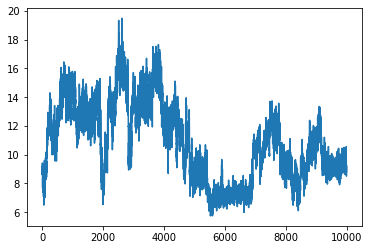

In [25]:
plt.plot(data1[:,1])

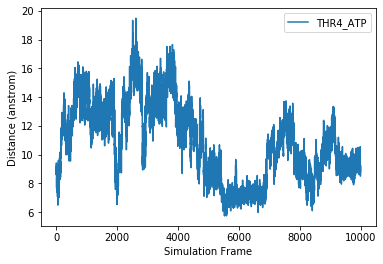

In [26]:
sample = headers[1]

plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (anstrom)')

fig_1 = plt.plot(data1[:, 1], label=sample)

plt.legend()
plt.savefig(F'{sample}.png') # dpi control over .savefig 

In [27]:
plt.savefig(F'{sample}1.png', dpi=300)

<Figure size 432x288 with 0 Axes>

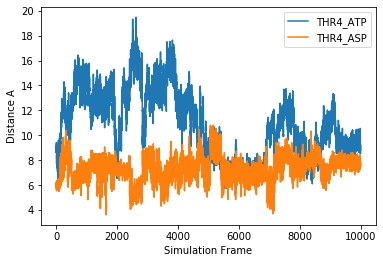

In [28]:
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance A')
plt.plot(data1[:,1], label=headers[1])
plt.plot(data1[:,2], label=headers[2])

plt.legend()
plt.savefig(F'twosample.png', dpi=300)

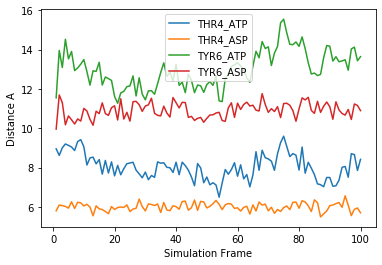

In [29]:
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance A')

for i in range(1, num_columns): # num_columns = len(data1[0,:])
    plt.plot(data1[:100, 0], data1[:100,i], label=headers[i]) # label is showing until you have plt.legend()

plt.legend() #you can control the postion of legend
plt.savefig(F'allsample3.png', dpi=300)

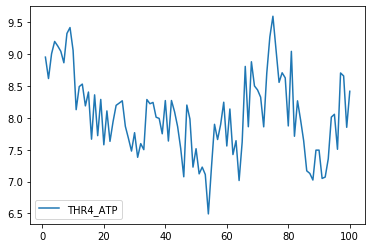

In [34]:
plt.figure()
plt.plot(data1[:100, 0], data1[:100,1], label=headers[1])
plt.legend()

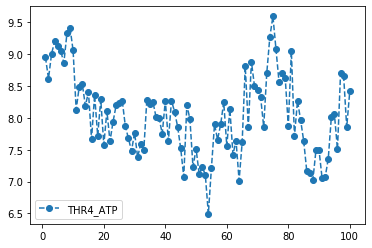

In [36]:
plt.figure()
plt.plot(data1[:100, 0], data1[:100,1], '--o', label=headers[1])
plt.legend()